In [ ]:
#import gensim
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[=================================================-] 100.0% 1662.6/1662.8MB downloaded


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import gensim
import pickle
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gensim.__version__

'4.3.1'

In [ ]:
with open('/content/drive/MyDrive/RaH_NLP_24/wv.pickle', 'wb') as f:
  pickle.dump(wv, f)


In [ ]:
#load the dataset
df1 = pd.read_excel("/content/drive/MyDrive/RaH_NLP_24/1. Ford F Series Logic Tree Matching (17 Mar 2023) (1).xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/RaH_NLP_24/2. Dodge Logic Tree Matching (17 Mar 2023) (1).xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/RaH_NLP_24/3. Toyota Logic Tree Matching (17 Mar 2023) (1).xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/RaH_NLP_24/4. Chevrolet Logic Tree Matching (17 Mar 2023) (1).xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/RaH_NLP_24/5. Ford Escape Logic Tree Matching (17 Mar 2023) (1).xlsx")
df6 = pd.read_excel("/content/drive/MyDrive/RaH_NLP_24/6. Ford Explorer Logic Tree Matching (17 Mar 2023) (1).xlsx")
df7 = pd.read_excel("/content/drive/MyDrive/RaH_NLP_24/7. Honda Logic Tree Matching (17 Mar 2023) (1).xlsx")
df8 = pd.read_excel("/content/drive/MyDrive/RaH_NLP_24/8. Nissan Logic Tree Matching (17 Mar 2023) (1).xlsx")
df9 = pd.read_excel("/content/drive/MyDrive/RaH_NLP_24/9. GMC Logic Tree Matching (17 Mar 2023) (1).xlsx")

In [ ]:
#append all the df into one df 
df = df1.append([df2, df3,df4,df5,df6,df7,df8,df9])

<ipython-input-43-a6fc9bdf133c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append([df2, df3,df4,df5,df6,df7,df8,df9])


In [ ]:
df

,S.No,Vehicle,Model,Model Year,Problem,Sub Problem,Logic Tree Name,Model Title,Model Problem,distance covered,description
0,1,Ford,Fusion,2008,brakes problems,ABS Failure,Abs light on,Fusion ES 2.3L,Automatic transmission,"74,000 miles",ABS action occurred a year ago when I stopped...
1,2,Ford,Fusion,2008,brakes problems,ABS Failure,Abs light on,Fusion SE 4 cyl,Automatic transmission,"105,633 miles",The ABS failed as I was driving on the express...
2,3,Ford,Fusion,2008,brakes problems,ABS Failure,Abs light on,Fusion SE 2.3L 4 cyl,Automatic transmission,"56,000 miles","At random, the ABS controller can fail renderi..."
3,4,Ford,F-150,2002,brakes problems,Abs Faulty,Abs light on,F-150 XLT 5.4L,Automatic transmission,"165,000 miles","ABS light is always on, says Wheel Speed Sens..."
4,5,Ford,F-150,2002,brakes problems,Abs Faulty,Abs light on,F-150 XLT 5.4L V8,Automatic transmission,"68,000 miles",I have replaced wheel hub assemblies on both s...
...,...,...,...,...,...,...,...,...,...,...,...
695,322,GMC,Sierra_1500,2007,engine problems,Reduced Power Or Limp Mode,Low power hard acceleration,Sierra 1500 SLE 5.3L,Automatic transmission,"98,000 miles",I've helped many people with this problem and...
696,323,GMC,Terrain,2010,engine problems,Reduced Power While Driving,Low power hard acceleration,Terrain SLT-2 V6,Automatic transmission,"115,653 miles","Even with the high miles, this was excessive!..."
697,324,GMC,Terrain,2010,engine problems,Reduced Power While Driving,Low power hard acceleration,Terrain,Automatic transmission,"80,000 miles",I have had this problem for almost a year. My ...
698,325,GMC,Terrain,2010,engine problems,Reduced Power While Driving,Low power hard acceleration,Terrain SLT V6,Automatic transmission,"157,000 miles",I have owned this car for 1/12 years and have ...


In [ ]:
count_nan = df['Logic Tree Name'].isnull().sum()
count_nan

0

In [ ]:
#to vizualize the unique labels
df['Logic Tree Name'].unique()

array(['Abs light on', 'Ac not working', 'All 4 wheel drive not working',
       'Back up camera not working', 'Battery drain when vehicle is off',
       'Coolant leak', 'Engine overheating', 'Engine oil leak',
       'Exhaust leak noise ', 'Low engine oil pressure level',
       'Low power hard acceleration', 'Misfire', 'No heat from hvac',
       'No start', 'Power window not working', 'Steering problems',
       'Windshield wipers inoperative', 'Logic Tree Name',
       'Driveline shudder noise binding', 'Exhaust leak noise'],
      dtype=object)

In [ ]:
len(df['Logic Tree Name'].unique())

20

In [ ]:
df['Logic Tree Name'] = df['Logic Tree Name'].str.strip()

In [ ]:
df['Logic Tree Name'].unique()

array(['Abs light on', 'Ac not working', 'All 4 wheel drive not working',
       'Back up camera not working', 'Battery drain when vehicle is off',
       'Coolant leak', 'Engine overheating', 'Engine oil leak',
       'Exhaust leak noise', 'Low engine oil pressure level',
       'Low power hard acceleration', 'Misfire', 'No heat from hvac',
       'No start', 'Power window not working', 'Steering problems',
       'Windshield wipers inoperative', 'Logic Tree Name',
       'Driveline shudder noise binding'], dtype=object)

In [ ]:
len(df['Logic Tree Name'].unique())

19

Logic Tree Name
Abs light on                          577
Ac not working                       2024
All 4 wheel drive not working         482
Back up camera not working            154
Battery drain when vehicle is off     383
Coolant leak                          578
Driveline shudder noise binding         2
Engine oil leak                       485
Engine overheating                    490
Exhaust leak noise                     86
Logic Tree Name                         1
Low engine oil pressure level         119
Low power hard acceleration          1111
Misfire                               230
No heat from hvac                     678
No start                             1508
Power window not working             1096
Steering problems                    1465
Windshield wipers inoperative         421
dtype: int64


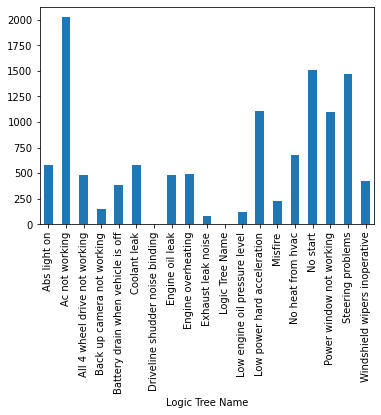

In [ ]:
#Check the number of occurances of each label
print(df.groupby('Logic Tree Name').size())
 
# Plotting the bar chart
%matplotlib inline
df.groupby('Logic Tree Name').size().plot(kind='bar');

In [ ]:
# Pre-process the text data
def preprocess_text(text):
    # Remove special characters and numbers
    text = gensim.utils.simple_preprocess(text)
    return text

In [ ]:
def remove_after_tab(sentence):
    # Find the index of the first occurrence of '\t'
    index = sentence.find('\t')
    
    # If there is no '\t' in the sentence, return the original sentence
    if index == -1:
        return sentence
    
    # Otherwise, return the sentence up to the index of the first '\t'
    return sentence[:index]

In [ ]:
df['description'].iloc[0]

" ABS action occurred a year ago when I stopped and ran over a pothole, brakes went to the floor. Over the next couple of days the brakes returned to normal. It has happened a few times since. The last time, the pedal did not return to it's normal firmness. Tried to have the brakes bled. Just spent $350 replacing the rear pads, rotors and calipers.... brake pedal still goes all the way to the floor. I have to pump my brakes every time I stop. This is a known issue and Ford should issue a recall.\t\t\t\t- Bob K.,\t\t\t\tCincinnati, OH, US"

In [ ]:
df['description'] = df['description'].apply(remove_after_tab)

In [ ]:
df['description'].iloc[0]

" ABS action occurred a year ago when I stopped and ran over a pothole, brakes went to the floor. Over the next couple of days the brakes returned to normal. It has happened a few times since. The last time, the pedal did not return to it's normal firmness. Tried to have the brakes bled. Just spent $350 replacing the rear pads, rotors and calipers.... brake pedal still goes all the way to the floor. I have to pump my brakes every time I stop. This is a known issue and Ford should issue a recall."

In [ ]:
df['description'] = df['description'].apply(preprocess_text)

In [ ]:
df['description'].iloc[0]

['abs',
 'action',
 'occurred',
 'year',
 'ago',
 'when',
 'stopped',
 'and',
 'ran',
 'over',
 'pothole',
 'brakes',
 'went',
 'to',
 'the',
 'floor',
 'over',
 'the',
 'next',
 'couple',
 'of',
 'days',
 'the',
 'brakes',
 'returned',
 'to',
 'normal',
 'it',
 'has',
 'happened',
 'few',
 'times',
 'since',
 'the',
 'last',
 'time',
 'the',
 'pedal',
 'did',
 'not',
 'return',
 'to',
 'it',
 'normal',
 'firmness',
 'tried',
 'to',
 'have',
 'the',
 'brakes',
 'bled',
 'just',
 'spent',
 'replacing',
 'the',
 'rear',
 'pads',
 'rotors',
 'and',
 'calipers',
 'brake',
 'pedal',
 'still',
 'goes',
 'all',
 'the',
 'way',
 'to',
 'the',
 'floor',
 'have',
 'to',
 'pump',
 'my',
 'brakes',
 'every',
 'time',
 'stop',
 'this',
 'is',
 'known',
 'issue',
 'and',
 'ford',
 'should',
 'issue',
 'recall']

In [ ]:
# Train a word2vec model on the text data
wv_model = Word2Vec(df['description'], vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
# Create the features
def get_vector(text):
    vector = np.zeros(100)
    count = 0
    for word in text:
        try:
            vector += wv_model.wv[word]
            count += 1
        except KeyError:
            pass
    if count != 0:
        vector /= count
    return vector

In [ ]:
df['features'] = df['description'].apply(get_vector)

# Models

In [ ]:
len(df['Logic Tree Name'].unique())

19

In [ ]:
class_counts = df['Logic Tree Name'].value_counts()
print(class_counts)
# Get the name of the least populated class
least_populated_class = class_counts.index[-1]
print(least_populated_class)
# Filter out rows belonging to the least populated class
df = df[df['Logic Tree Name'] != least_populated_class]

Ac not working                       2024
No start                             1508
Steering problems                    1465
Low power hard acceleration          1111
Power window not working             1096
No heat from hvac                     678
Coolant leak                          578
Abs light on                          577
Engine overheating                    490
Engine oil leak                       485
All 4 wheel drive not working         482
Windshield wipers inoperative         421
Battery drain when vehicle is off     383
Misfire                               230
Back up camera not working            154
Low engine oil pressure level         119
Exhaust leak noise                     86
Driveline shudder noise binding         2
Logic Tree Name                         1
Name: Logic Tree Name, dtype: int64
Logic Tree Name


In [ ]:
len(df['Logic Tree Name'].unique())

18

In [ ]:
# Create the labels
labels = df['Logic Tree Name']

In [ ]:
len(labels)

11889

In [ ]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df['features'].tolist(), labels, test_size=0.2, stratify=labels)

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Train the model
lr_model = LogisticRegression()
lr_model.fit(train_features, train_labels)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr_model.predict(test_features)
print(len(y_pred))

2378


In [ ]:
test_labels=test_labels.tolist()

In [ ]:
test_labels[1]

'Power window not working'

In [ ]:
# index=[]
# for i in range(len(y_pred)):
#   print(y_pred[i])
#   print(test_labels[i])
#   if y_pred[i] == test_labels[i]:
#     index.append(i)

In [ ]:
test_labels[:10]

['Ac not working',
 'Power window not working',
 'Steering problems',
 'Ac not working',
 'Ac not working',
 'Ac not working',
 'Ac not working',
 'Coolant leak',
 'Battery drain when vehicle is off',
 'No start']

In [ ]:
# y_val_proba = lr_model.predict_proba(test_features)

In [ ]:
# Make predictions on the test data
predictions = lr_model.predict(test_features)

# Evaluate the model performance
print(classification_report(test_labels, predictions))

                                   precision    recall  f1-score   support

                     Abs light on       0.50      0.50      0.50       115
                   Ac not working       0.56      0.82      0.66       405
    All 4 wheel drive not working       0.52      0.27      0.36        96
       Back up camera not working       0.53      0.29      0.38        31
Battery drain when vehicle is off       0.77      0.31      0.44        77
                     Coolant leak       0.51      0.45      0.48       116
                  Engine oil leak       0.58      0.66      0.62        97
               Engine overheating       0.37      0.23      0.29        98
               Exhaust leak noise       1.00      0.06      0.11        17
    Low engine oil pressure level       0.50      0.25      0.33        24
      Low power hard acceleration       0.54      0.64      0.58       222
                          Misfire       0.21      0.07      0.10        46
                No heat 

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(test_features, test_labels)

In [ ]:
# Train the model
rf_model = RandomForestClassifier()
rf_model.fit(train_features, train_labels)

RandomForestClassifier()

In [ ]:
# Make predictions on the test data
predictions = rf_model.predict(test_features)

# Evaluate the model performance
print(classification_report(test_labels, predictions))

                                   precision    recall  f1-score   support

                     Abs light on       0.55      0.25      0.35       115
                   Ac not working       0.48      0.86      0.62       405
    All 4 wheel drive not working       0.98      0.83      0.90        96
       Back up camera not working       1.00      0.52      0.68        31
Battery drain when vehicle is off       0.67      0.08      0.14        77
                     Coolant leak       0.84      0.88      0.86       116
                  Engine oil leak       0.89      0.90      0.89        97
               Engine overheating       0.91      0.71      0.80        98
               Exhaust leak noise       1.00      0.76      0.87        17
    Low engine oil pressure level       1.00      0.71      0.83        24
      Low power hard acceleration       0.76      0.83      0.80       222
                          Misfire       1.00      0.07      0.12        46
                No heat 

In [ ]:
# Train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(train_features, train_labels)

DecisionTreeClassifier()

In [ ]:
# Make predictions on the test data
predictions = dt_model.predict(test_features)

# Evaluate the model performance
print(classification_report(test_labels, predictions))

                                   precision    recall  f1-score   support

                     Abs light on       0.27      0.24      0.26       115
                   Ac not working       0.45      0.40      0.43       405
    All 4 wheel drive not working       0.62      0.83      0.71        96
       Back up camera not working       0.52      0.55      0.53        31
Battery drain when vehicle is off       0.15      0.17      0.16        77
                     Coolant leak       0.65      0.90      0.75       116
                  Engine oil leak       0.68      0.86      0.76        97
               Engine overheating       0.61      0.71      0.66        98
               Exhaust leak noise       0.59      0.76      0.67        17
    Low engine oil pressure level       0.81      0.71      0.76        24
      Low power hard acceleration       0.61      0.76      0.68       222
                          Misfire       0.14      0.11      0.12        46
                No heat 

In [ ]:
# Train the model
svc_model = LinearSVC()
svc_model.fit(train_features, train_labels)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
# Make predictions on the test data
predictions = svc_model.predict(test_features)

# Evaluate the model performance
print(classification_report(test_labels, predictions))

                                   precision    recall  f1-score   support

                     Abs light on       0.53      0.54      0.53       115
                   Ac not working       0.53      0.84      0.65       405
    All 4 wheel drive not working       0.60      0.25      0.35        96
       Back up camera not working       0.71      0.32      0.44        31
Battery drain when vehicle is off       0.75      0.27      0.40        77
                     Coolant leak       0.49      0.52      0.50       116
                  Engine oil leak       0.59      0.66      0.62        97
               Engine overheating       0.32      0.06      0.10        98
               Exhaust leak noise       0.00      0.00      0.00        17
    Low engine oil pressure level       0.43      0.12      0.19        24
      Low power hard acceleration       0.60      0.66      0.63       222
                          Misfire       0.00      0.00      0.00        46
                No heat 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
label_problem = df['Logic Tree Name'].unique()

In [ ]:
label_problem

array(['Abs light on', 'Ac not working', 'All 4 wheel drive not working',
       'Back up camera not working', 'Battery drain when vehicle is off',
       'Coolant leak', 'Engine overheating', 'Engine oil leak',
       'Exhaust leak noise', 'Low engine oil pressure level',
       'Low power hard acceleration', 'Misfire', 'No heat from hvac',
       'No start', 'Power window not working', 'Steering problems',
       'Windshield wipers inoperative', 'Driveline shudder noise binding'],
      dtype=object)

In [ ]:
# Save the word2vec model to disk
with open('/content/drive/MyDrive/RaH_NLP_24/wv_model.pickle', 'wb') as f:
    pickle.dump(wv_model, f)

# Save the logistic regression model to disk
with open('/content/drive/MyDrive/RaH_NLP_24/lr_model.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

# Save the SVC model to disk
with open('/content/drive/MyDrive/RaH_NLP_24/svc_model.pickle', 'wb') as f:
    pickle.dump(svc_model, f)

with open('/content/drive/MyDrive/RaH_NLP_24/rf_model.pickle', 'wb') as f:
    pickle.dump(rf_model, f)

# Save the dt model to disk
with open('/content/drive/MyDrive/RaH_NLP_24/dt_model.pickle', 'wb') as f:
    pickle.dump(dt_model, f)

with open('/content/drive/MyDrive/RaH_NLP_24/wv.pickle', 'wb') as f:
    pickle.dump(label_problem, f)

In [ ]:
# Load the word2vec model from disk
with open('/content/drive/MyDrive/RaH_NLP_new/wv_model.pickle', 'rb') as f:
    wv_model = pickle.load(f)

# Load the logistic regression model from disk
with open('/content/drive/MyDrive/RaH_NLP_new/lr_model.pickle', 'rb') as f:
    lr_model = pickle.load(f)

with open('/content/drive/MyDrive/RaH_NLP_new/wv.pickle', 'rb') as f:
    problem_labels = pickle.load(f)

# Testing

In [ ]:
problem_labels

array(['Abs light on', 'Ac not working', 'All 4 wheel drive not working',
       'Back up camera not working', 'Battery drain when vehicle is off',
       'Coolant leak', 'Engine overheating', 'Engine oil leak',
       'Exhaust leak noise', 'Low engine oil pressure level',
       'Low power hard acceleration', 'Misfire', 'No heat from hvac',
       'No start', 'Power window not working', 'Steering problems',
       'Windshield wipers inoperative'], dtype=object)

In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: Engine Misfire
The label is: Misfire


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: Running Rough
The label is: Engine overheating


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: Low power hard acceleration
The label is: Low power hard acceleration


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: hard acceleration
The label is: Steering problems


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: Low engine oil pressure
The label is: Engine oil leak


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: Cylinder misfire
The label is: Misfire


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: coolant leakage
The label is: Engine oil leak


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: barely running
The label is: Windshield wipers inoperative


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: Ac not working
The label is: Ac not working


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: A/C not working
The label is: Ac not working


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description:  wipers are not working
The label is: Windshield wipers inoperative


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: no heat
The label is: No heat from hvac


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: Low engine oil pressure
The label is: Engine oil leak


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: No traction
The label is: Low power hard acceleration


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: AWD warning messages
The label is: Low power hard acceleration


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: ABS Light is on
The label is: Abs light on


In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
#predict_label(vector)

# Predict the label
prediction = lr_model.predict([vector])

# Output the label
print('The label is:', prediction[0])

Enter a text description: Brake light problem
The label is: Abs light on


Extra techniques on data to visualize the similarity
, not included in training

# Distance

In [ ]:
label_problem = df['Logic Tree Name'].unique()

In [ ]:
label_problem

array(['Power Window not Working', 'AC not Working', 'Coolant Leak',
       'Back Up Camera Not Working when the vehicle is shifted into reverse',
       'Low Power Hard Acceleration', 'Engine Oil Leak',
       'Engine is Overheating/Running too Hot',
       'Hard Steering/No Power Steering Assist',
       'All/4 Wheel Drive not Working',
       'Low Engine Oil Pressure level Warning', 'No Start',
       'No Heat from HVAC', 'Engine Misfire/Cylinder Misfire',
       'Windshield Wipers Inoperative/Working turned off',
       'Battery Drain when vehicle is off', 'Exhaust Leak Noise',
       'ABS light on'], dtype=object)

In [ ]:
grouped = df.groupby('Logic Tree Name')['features']

In [ ]:
grouped

In [ ]:
mean_values = grouped.mean()

print(type(mean_values))
mean_f=mean_values.to_frame()

<class 'pandas.core.series.Series'>


In [ ]:
mean_f

,features
Logic Tree Name,
ABS light on,"[-0.09678042907140987, 0.13969860216745425, -0..."
AC not Working,"[-0.21173410818384167, 0.055361652840062794, -..."
All/4 Wheel Drive not Working,"[-0.17927295530460538, 0.11678166472848439, -0..."
Back Up Camera Not Working when the vehicle is shifted into reverse,"[-0.10935061702229028, 0.11172177442241824, -0..."
Battery Drain when vehicle is off,"[-0.21595191592889934, 0.09396696324685681, -0..."
Coolant Leak,"[-0.18962308781930948, 0.06277121337973533, -0..."
Engine Misfire/Cylinder Misfire,"[-0.1702738909045629, 0.040589054305481403, -0..."
Engine Oil Leak,"[-0.31255756846387833, 0.017744569732327662, -..."
Engine is Overheating/Running too Hot,"[-0.1819616285885761, 0.07773471504697844, -0...."


In [ ]:
df['features']

0      [0.18791604414582253, 0.12679438963532447, -0....
1      [0.28120659850537777, 0.6728602879577212, 0.05...
2      [-0.1359587510014535, 0.5383572255163208, -0.1...
3      [-0.15444839560306303, 0.1254268113922777, -0....
4      [-0.25585776292657675, 0.22352820257819667, -0...
                             ...                        
639    [-0.2518869000033136, 0.12486662790881106, -0....
640    [-0.5987819684368949, -0.022444142434265343, -...
641    [0.3221164382994175, 0.6024896054528653, 0.302...
642    [-0.5122611897864512, 0.05080049396825156, -0....
643    [-0.2690768113049368, 0.27643419400556013, -0....
Name: features, Length: 12146, dtype: object

In [ ]:
mins=[]
maxs=[]
for i in label_problem:
  print(i)
  d=[]
  f = df.loc[df['Logic Tree Name'] == i  , 'features']
  for val in f:
    m_val = mean_f.at[i, 'features']
    distance = np.linalg.norm(val - m_val)
    d.append(distance)
  mins.append(min(d))
  maxs.append(max(d))

Power Window not Working
AC not Working
Coolant Leak
Back Up Camera Not Working when the vehicle is shifted into reverse
Low Power Hard Acceleration
Engine Oil Leak
Engine is Overheating/Running too Hot
Hard Steering/No Power Steering Assist
All/4 Wheel Drive not Working
Low Engine Oil Pressure level Warning
No Start
No Heat from HVAC
Engine Misfire/Cylinder Misfire
Windshield Wipers Inoperative/Working turned off
Battery Drain when vehicle is off
Exhaust Leak Noise
ABS light on


In [ ]:
mins

[0.41037464662032913,
 0.5807174190945213,
 0.6863428532659257,
 0.66635895839962,
 0.5264479245005683,
 0.6141827421450137,
 0.5329148173422106,
 0.5373098983392599,
 0.6402125947766503,
 0.8158975072191968,
 0.5919505091300379,
 0.5955741931960484,
 0.5563872640772937,
 0.6956686078078524,
 0.6434372124408634,
 0.6071028632081924,
 0.8890097389844791]

In [ ]:
maxs

[6.0253324078070944,
 5.277813378347086,
 4.536340844615451,
 3.7916158693327686,
 5.401309391680927,
 5.29131595813496,
 4.986142146303962,
 6.983571938303574,
 4.369464990041002,
 3.6184855220252263,
 6.360317046600056,
 4.655532800422257,
 4.040585236609492,
 5.11621510317226,
 5.392792259745425,
 3.199666174889857,
 4.194146776028361]

In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
d=[]
for i in label_problem:
  m_val = mean_f.at[i, 'features']
  distance = np.linalg.norm(vector - m_val)
  d.append(distance)

Enter a text description: AC Problem 


In [ ]:
d

[7.551091041497081,
 7.344425628360352,
 7.5196005039064175,
 7.524640449124782,
 7.708615351944343,
 7.570102723749757,
 7.559775494966555,
 7.525613229505452,
 7.626976665723836,
 7.576545647139077,
 7.554114850316371,
 7.393934218349565,
 7.567527563639661,
 7.631847309728495,
 7.575834785789813,
 7.508368316843744,
 7.5181666146177495]

In [ ]:
count=0
for i in range(len(d)):
  if d[i]<maxs[i]:
    count+=1
if count == 0:
  print("outlier")
else:
  print(count)
  print("predict")

outlier


# Similarity

In [ ]:
def predict_label(vector):
    similarities = []
    for label in label_problem:
        label_vector = get_vector(preprocess_text(label))
        similarity = np.dot(vector, label_vector) / (np.linalg.norm(vector) * np.linalg.norm(label_vector))
        similarities.append(similarity)
        print(f'Similarity with {label}: {similarity}')
    prediction = label_problem[np.argmax(similarities)]
    print('The predicted label is:', prediction)

In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
predict_label(vector)

# # Predict the label
# prediction = lr_model.predict([vector])
# p=lr_model.predict_proba([vector])

# # Output the label
# print('The label is:', prediction[0])
# print(p)
# print(p.argmax(1).item())

Enter a text description:  Driver's side window crashed 
Similarity with Power Window not Working: 0.6748241755691501
Similarity with AC not Working: 0.47812369176718394
Similarity with Coolant Leak: 0.10898334919621777
Similarity with Back Up Camera Not Working when the vehicle is shifted into reverse: 0.5119281558561664
Similarity with Low Power Hard Acceleration: 0.2899174917103292
Similarity with Engine Oil Leak: 0.15278502509368866
Similarity with Engine is Overheating/Running too Hot: 0.3405791183754337
Similarity with Hard Steering/No Power Steering Assist: 0.34954851072869364
Similarity with All/4 Wheel Drive not Working: 0.46639349914477585
Similarity with Low Engine Oil Pressure level Warning: 0.15406068957098115
Similarity with No Start: 0.22736281244758663
Similarity with No Heat from HVAC: 0.3465789018266372
Similarity with Engine Misfire/Cylinder Misfire: 0.1365232487579222
Similarity with Windshield Wipers Inoperative/Working turned off: 0.62375520814857
Similarity with 

In [ ]:
# Get user input
text = input('Enter a text description: ')
text = preprocess_text(text)
vector = get_vector(text)
predict_label(vector)

Enter a text description: tyre is flat
Similarity with Power Window not Working: 0.33666528221617
Similarity with AC not Working: 0.3646626745237001
Similarity with Coolant Leak: 0.24313259625511208
Similarity with Back Up Camera Not Working when the vehicle is shifted into reverse: 0.4817297879564545
Similarity with Low Power Hard Acceleration: 0.32473158531686497
Similarity with Engine Oil Leak: 0.2894760390612055
Similarity with Engine is Overheating/Running too Hot: 0.6291832761029714
Similarity with Hard Steering/No Power Steering Assist: 0.34491818739099206
Similarity with All/4 Wheel Drive not Working: 0.326369268974351
Similarity with Low Engine Oil Pressure level Warning: 0.2334322929224993
Similarity with No Start: 0.25596742997678623
Similarity with No Heat from HVAC: 0.38864767366441483
Similarity with Engine Misfire/Cylinder Misfire: 0.1230239931795143
Similarity with Windshield Wipers Inoperative/Working turned off: 0.24056493136272372
Similarity with Battery Drain when v